In [1]:
import xarray as xr
import numpy as np
import dask.array as da
import matplotlib.pyplot as plt
import os
from dask.distributed import Client, LocalCluster
from datetime import datetime,timedelta
import glob
import indices_function as ifun
import warnings
from rechunker import rechunk
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.colors as mcolors

warnings.filterwarnings('ignore')

In [2]:
cluster = LocalCluster(
    n_workers=10, 
    threads_per_worker=1,
    timeout='3600s',
    memory_limit='5GB',   
)
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 10,Total memory: 46.57 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40891,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 46.57 GiB
Comm: tcp://127.0.0.1:44397,Total threads: 1
Dashboard: http://127.0.0.1:34043/status,Memory: 4.66 GiB
Nanny: tcp://127.0.0.1:34323,


In [3]:
var="tasmax"
DCP=xr.open_zarr("/nobackupp10/skhajehe/dcp-indices/multimodel/annual_average/"+var+"/2014.zarr")
PRISM=xr.open_zarr("/nobackupp10/skhajehe/dcp-indices/prism/annual_average/"+var+"/2014.zarr")
PRISM=PRISM.where(DCP[var].notnull())
DCP['lon'] = (DCP['lon'] + 180) % 360 - 180
DCP = DCP.sortby(DCP.lon)
PRISM['lon'] = (PRISM['lon'] + 180) % 360 - 180
PRISM = PRISM.sortby(PRISM.lon)
DCP.load()
PRISM.load()

<xarray.Dataset> Size: 87MB
Dimensions:  (lat: 3105, lon: 7025)
Coordinates:
  * lat      (lat) float64 25kB 24.07 24.08 24.08 24.09 ... 49.92 49.93 49.93
  * lon      (lon) float64 56kB -125.0 -125.0 -125.0 ... -66.5 -66.49 -66.48
Data variables:
    tasmax   (lat, lon) float32 87MB nan nan nan nan nan ... nan nan nan nan nan

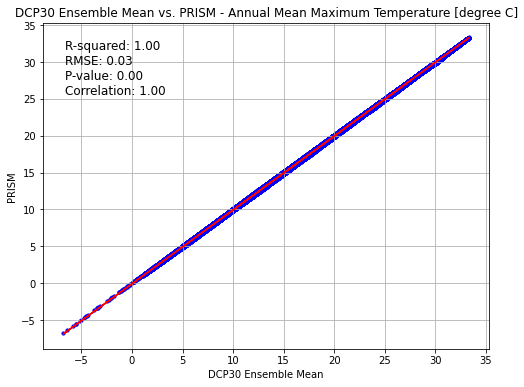

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

# Linear regression
# DCP_filtered1= DCP.dropna(dim=('lat'),how='any')
DCP_filtered= DCP

# PRISM_filtered1 = PRISM.dropna(dim=('lat'),how='any')
PRISM_filtered = PRISM


X1 = DCP_filtered['tasmax'].values.reshape(-1, 1)
y1 = PRISM_filtered['tasmax'].values.reshape(-1, 1)
X=X1[~np.isnan(X1)]
y=y1[~np.isnan(y1)]

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Predictions and R-squared value
y_pred = model.predict(X.reshape(-1, 1))
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
corr, p_value = pearsonr(X, y)

# Plotting scatter plot with regression line, R2, RMSE, and p-value
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=10, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('DCP30 Ensemble Mean')
plt.ylabel('PRISM')
plt.title('DCP30 Ensemble Mean vs. PRISM - Annual Mean Maximum Temperature [degree C]')
# plt.legend()

# Annotate plot with statistics
stats_text = f"R-squared: {r2:.2f}\nRMSE: {rmse:.2f}\nP-value: {p_value:.2f}\nCorrelation: {corr:.2f}"
plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

plt.grid(True)
# plt.show()
plt.savefig('./plot/fig3_max_temp.png')


In [5]:
var="tasmin"
DCP=xr.open_zarr("/nobackupp10/skhajehe/dcp-indices/multimodel/annual_average/"+var+"/2014.zarr")
PRISM=xr.open_zarr("/nobackupp10/skhajehe/dcp-indices/prism/annual_average/"+var+"/2014.zarr")
PRISM=PRISM.where(DCP[var].notnull())
DCP['lon'] = (DCP['lon'] + 180) % 360 - 180
DCP = DCP.sortby(DCP.lon)
PRISM['lon'] = (PRISM['lon'] + 180) % 360 - 180
PRISM = PRISM.sortby(PRISM.lon)
DCP.load()
PRISM.load()

<xarray.Dataset> Size: 87MB
Dimensions:  (lat: 3105, lon: 7025)
Coordinates:
  * lat      (lat) float64 25kB 24.07 24.08 24.08 24.09 ... 49.92 49.93 49.93
  * lon      (lon) float64 56kB -125.0 -125.0 -125.0 ... -66.5 -66.49 -66.48
Data variables:
    tasmin   (lat, lon) float32 87MB nan nan nan nan nan ... nan nan nan nan nan

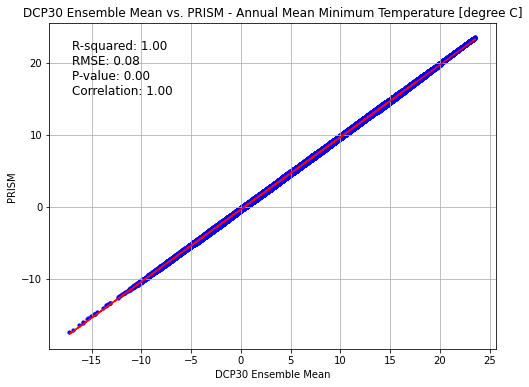

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

# Linear regression
# DCP_filtered1= DCP.dropna(dim=('lat'),how='any')
DCP_filtered= DCP

# PRISM_filtered1 = PRISM.dropna(dim=('lat'),how='any')
PRISM_filtered = PRISM


X1 = DCP_filtered['tasmin'].values.reshape(-1, 1)
y1 = PRISM_filtered['tasmin'].values.reshape(-1, 1)
X=X1[~np.isnan(X1)]
y=y1[~np.isnan(y1)]

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Predictions and R-squared value
y_pred = model.predict(X.reshape(-1, 1))
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
corr, p_value = pearsonr(X, y)

# Plotting scatter plot with regression line, R2, RMSE, and p-value
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=10, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('DCP30 Ensemble Mean')
plt.ylabel('PRISM')
plt.title('DCP30 Ensemble Mean vs. PRISM - Annual Mean Minimum Temperature [degree C]')
# plt.legend()

# Annotate plot with statistics
stats_text = f"R-squared: {r2:.2f}\nRMSE: {rmse:.2f}\nP-value: {p_value:.2f}\nCorrelation: {corr:.2f}"
plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

plt.grid(True)
# plt.show()
plt.savefig('./plot/fig3_min_temp.png')


In [7]:
var="pr"
DCP=xr.open_zarr("/nobackupp10/skhajehe/dcp-indices/multimodel/annual_average/"+var+"/2014.zarr")
PRISM=xr.open_zarr("/nobackupp10/skhajehe/dcp-indices/prism/annual_average/"+var+"/2014.zarr")
PRISM=PRISM.where(DCP[var].notnull())
DCP['lon'] = (DCP['lon'] + 180) % 360 - 180
DCP = DCP.sortby(DCP.lon)
PRISM['lon'] = (PRISM['lon'] + 180) % 360 - 180
PRISM = PRISM.sortby(PRISM.lon)
DCP.load()
PRISM.load()

<xarray.Dataset> Size: 87MB
Dimensions:  (lat: 3105, lon: 7025)
Coordinates:
  * lat      (lat) float64 25kB 24.07 24.08 24.08 24.09 ... 49.92 49.93 49.93
  * lon      (lon) float64 56kB -125.0 -125.0 -125.0 ... -66.5 -66.49 -66.48
Data variables:
    pr       (lat, lon) float32 87MB nan nan nan nan nan ... nan nan nan nan nan

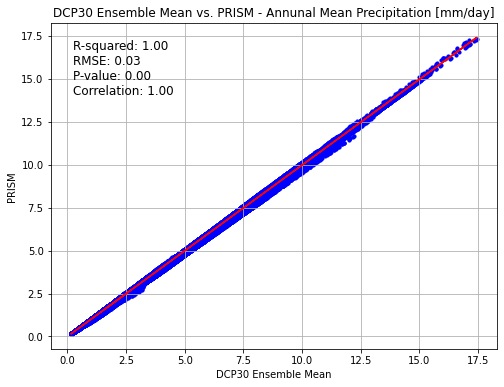

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

# Linear regression
# DCP_filtered1= DCP.dropna(dim=('lat'),how='any')
DCP_filtered= DCP

# PRISM_filtered1 = PRISM.dropna(dim=('lat'),how='any')
PRISM_filtered = PRISM


X1 = DCP_filtered['pr'].values.reshape(-1, 1)
y1 = PRISM_filtered['pr'].values.reshape(-1, 1)
X=X1[~np.isnan(X1)]
y=y1[~np.isnan(y1)]

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Predictions and R-squared value
y_pred = model.predict(X.reshape(-1, 1))
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
corr, p_value = pearsonr(X, y)

# Plotting scatter plot with regression line, R2, RMSE, and p-value
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=10, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('DCP30 Ensemble Mean')
plt.ylabel('PRISM')
plt.title('DCP30 Ensemble Mean vs. PRISM - Annunal Mean Precipitation [mm/day]')
# plt.legend()

# Annotate plot with statistics
stats_text = f"R-squared: {r2:.2f}\nRMSE: {rmse:.2f}\nP-value: {p_value:.2f}\nCorrelation: {corr:.2f}"
plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

plt.grid(True)
# plt.show()
plt.savefig('./plot/fig3_precip.png')


In [3]:
var="vpr"
DCP=xr.open_zarr("/nobackupp10/skhajehe/dcp-indices/multimodel/annual_average/"+var+"/2014.zarr")
PRISM=xr.open_zarr("/nobackupp10/skhajehe/dcp-indices/prism/annual_average/"+var+"/2014.zarr")
PRISM=PRISM.where(DCP[var].notnull())
DCP['lon'] = (DCP['lon'] + 180) % 360 - 180
DCP = DCP.sortby(DCP.lon)
PRISM['lon'] = (PRISM['lon'] + 180) % 360 - 180
PRISM = PRISM.sortby(PRISM.lon)
DCP.load()
PRISM.load()

<xarray.Dataset> Size: 87MB
Dimensions:  (lat: 3105, lon: 7025)
Coordinates:
  * lat      (lat) float64 25kB 24.07 24.08 24.08 24.09 ... 49.92 49.93 49.93
  * lon      (lon) float64 56kB -125.0 -125.0 -125.0 ... -66.5 -66.49 -66.48
Data variables:
    vpr      (lat, lon) float32 87MB nan nan nan nan nan ... nan nan nan nan nan

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

# Linear regression
# DCP_filtered1= DCP.dropna(dim=('lat'),how='any')
DCP_filtered= DCP

# PRISM_filtered1 = PRISM.dropna(dim=('lat'),how='any')
PRISM_filtered = PRISM


X1 = DCP_filtered['vpr'].values.reshape(-1, 1)
y1 = PRISM_filtered['vpr'].values.reshape(-1, 1)
X=X1[~np.isnan(X1)]
y=y1[~np.isnan(y1)]

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Predictions and R-squared value
y_pred = model.predict(X.reshape(-1, 1))
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
corr, p_value = pearsonr(X, y)

# Plotting scatter plot with regression line, R2, RMSE, and p-value
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=10, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('DCP30 Ensemble Mean')
plt.ylabel('PRISM')
plt.title('DCP30 Ensemble Mean vs. PRISM - Annual Mean Vapor Pressure [hPa]')
# plt.legend()

# Annotate plot with statistics
stats_text = f"R-squared: {r2:.2f}\nRMSE: {rmse:.2f}\nP-value: {p_value:.2f}\nCorrelation: {corr:.2f}"
plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

plt.grid(True)
# plt.show()
plt.savefig('./plot/fig3_vpr.png')
